# CHECK POINT 1

## BUSINESS UNDERSTANDING

 ### BUSINESS OBJECTIVE

Tujuan utama proyek ini adalah Memprediksi risiko penyakit jantung berdasarkan faktor-faktor kesehatan untuk membantu dalam deteksi dini, pengambilan keputusan medis, serta rekomendasi preventif bagi individu berisiko tinggi guna mengurangi angka kejadian penyakit jantung.









### Assess Situation

Penyakit kardiovaskular (CVD) adalah penyebab utama kematian global, dengan 17,9 juta kematian setiap tahun, di mana 80% disebabkan oleh serangan jantung dan stroke.,serta beberapa indikator lain yang terkait dengan kondisi jantung. Data ini mencakup faktor risiko utama dan memiliki label target, yaitu HeartDisease, yang menunjukkan apakah seseorang memiliki penyakit jantung atau tidak, sehingga deteksi dini sangat penting. Dataset ini berisi fitur yang dapat digunakan untuk memprediksi risiko penyakit jantung, dengan mendeteksi individu lebih awal,tindakan pencegahan dapat dilakukan untuk menghindari komplikasi dan menurunkan angka kematian.

### Data Mining Goals

Melakukan eksplorasi dan pemodelan prediktif untuk mengidentifikasi faktor-faktor utama yang meningkatkan risiko penyakit jantung. Model yang dibangun harus mampu memberikan prediksi akurat tentang kemungkinan seseorang mengalami penyakit jantung berdasarkan fitur yang tersedia. Selain itu, hasil analisis ini dapat digunakan untuk memberikan wawasan kepada tenaga medis dan individu dalam mengambil langkah-langkah preventif guna mengurangi risiko penyakit jantung.

### Project Plan

1.Problem Understanding
Menentukan tujuan bisnis untuk deteksi dini penyakit jantung, memahami struktur data, dan menetapkan target data mining.

2.Data Understanding
Mengeksplorasi dataset untuk mengidentifikasi pola, distribusi data, serta hubungan antara variabel dengan HeartDisease.

3.Data Preparation
Membersihkan data, menangani nilai kosong, mengonversi variabel kategori, serta membagi dataset menjadi training dan testing.

4.Modeling
Mencoba berbagai algoritma machine learning (Logistic Regression, Decision Tree, Random Forest) dan mengevaluasi kinerjanya menggunakan accuracy, precision, recall, dan F1-score.

5.Evaluation
Memilih model terbaik berdasarkan hasil evaluasi, menginterpretasikan faktor risiko utama, serta memastikan model tidak overfitting.

6.Deployment & Monitoring
Mengembangkan sistem prediksi, menguji model di dunia nyata, serta melakukan pembaruan data secara berkala untuk menjaga akurasi.

7.Documentation & Reporting
Menyusun laporan akhir yang mencakup analisis, hasil model, serta rekomendasi untuk tenaga medis dan pengguna akhir.

# CHECKPOINT 2

In [ ]:
import pandas as pd
df = pd.read_csv("/content/heart.csv")
df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# Mengecek struktur data frame (tipe data pada setiap kolom, jumlah baris dan kolom yang terdapat pada dataset)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Implementasi Statistik Deskriptif & Analisis Korelasi

In [ ]:
# Menampilkan statistik ringkasan seperti mean, median, min, max, dan kuartil
df.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
# Menghitung jumlah kemunculan nilai unik dalam kolom tertentu
df['Age'].value_counts()


,count
Age,
54,51
58,42
55,41
56,38
57,38
52,36
51,35
59,35
62,35


In [ ]:
print("Menghitung rata-rata:")
print(df.mean(numeric_only=True))

Menghitung rata-rata:
Age              53.510893
RestingBP       132.396514
Cholesterol     198.799564
FastingBS         0.233115
MaxHR           136.809368
Oldpeak           0.887364
HeartDisease      0.553377
dtype: float64


In [ ]:
print("Menghitung median:")
print(df.median(numeric_only=True))


Menghitung median:
Age              54.0
RestingBP       130.0
Cholesterol     223.0
FastingBS         0.0
MaxHR           138.0
Oldpeak           0.6
HeartDisease      1.0
dtype: float64


In [ ]:
print("Menghitung standar deviasi:")
print(df.std(numeric_only=True))

Menghitung standar deviasi:
Age               9.432617
RestingBP        18.514154
Cholesterol     109.384145
FastingBS         0.423046
MaxHR            25.460334
Oldpeak           1.066570
HeartDisease      0.497414
dtype: float64


In [ ]:
print("Mencari korelasi antar kolom numerik:")
print(df.corr(numeric_only=True))

Mencari korelasi antar kolom numerik:
                   Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000  


**INSIGHTS**



*   **HUBUNGAN KUAT** Oldpeak → HeartDisease (0.40):
Semakin tinggi nilai Oldpeak (depresi ST setelah latihan), semakin besar kemungkinan seseorang terkena penyakit jantung.
*   **HUBUNGAN LEMAH** Cholesterol → HeartDisease (-0.23):
Kadar kolesterol memiliki hubungan negatif yang lemah dengan penyakit jantung dalam dataset ini, yang agak tidak biasa.








## **DATA PREPARATION**

###Data Cleaning

**Data Cleaning** adalah proses membersihkan data dari duplikasi, nilai hilang, format salah, dan data tidak logis agar lebih akurat untuk analisis.

**MISSING VALUES**

In [ ]:
# Mengecek missing values dalam persentase
print((df.isna().sum() / len(df)) * 100)


Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64


In [ ]:
# Mengecek keberadaan nilai duplikat
df[df.duplicated()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [ ]:
# Mengecek outliers
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, '% Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,% Outliers
Age,0.000000
RestingBP,3.050109
Cholesterol,19.934641
FastingBS,23.311547
MaxHR,0.217865
Oldpeak,1.742919
HeartDisease,0.000000


 Dua kolom dengan outliers tertinggi adalah FastingBS (23.31%) dan Cholesterol (19.93%). Ini menunjukkan banyak nilai ekstrem dalam kadar gula darah puasa dan kolesterol, yang bisa disebabkan oleh variasi alami atau data tidak wajar.maka perlu dilakukan imputasi dengan metode yang paling sesuai, yaitu Winsorizing karena tetap mempertahankan struktur data tanpa membuang nilai ekstrem

### Melakukan imputasi

In [ ]:
# Melakukan Imputasi
columns_to_impute = ["FastingBS", "Cholesterol"]

for col in columns_to_impute:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df.loc[:, col] = df[col].clip(lower=lower_bound, upper=upper_bound)


<ipython-input-15-78d10729750e>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[289.    180.    283.    214.    195.    339.    237.    208.    207.
 284.    211.    164.    204.    234.    211.    273.    196.    201.
 248.    267.    223.    184.    201.    288.    215.    209.    260.
 284.    407.625 188.    407.625 167.    224.    172.    186.    254.
 306.    250.    177.    227.    230.    294.    264.    259.    175.
 318.    223.    216.    340.    289.    233.    205.    224.    245.
 180.    194.    270.    213.    365.    342.    253.    254.    224.
 277.    202.    260.    297.    225.    246.    407.625 265.    215.
 182.    218.    268.    163.    407.625 167.    100.    206.    277.
 238.    223.    196.    213.    139.    263.    216.    291.    229.
 208.    307.    210.    329.    182.    263.    207.    147.     85.
 269.    275.    179.    392.    407.625 186.    260.    254.    214.
 129. 

### Melakukan pengecekan ulang

In [ ]:
# Melakukan pengecekan ulang
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, '% Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,% Outliers
Age,0.000000
RestingBP,3.050109
Cholesterol,0.000000
FastingBS,0.000000
MaxHR,0.217865
Oldpeak,1.742919
HeartDisease,0.000000


### Incosistent Value

In [ ]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264.0,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193.0,0,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131.0,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236.0,0,LVH,174,N,0.0,Flat,1


In [ ]:
# Mengecek konsistensi data dengan mengambil/memanggil unique values dari masing-masing kolom
print("Nilai unik dari tiap kolom pada dataset:")
print('Age =', df['Age'].unique())
print('Sex =', df['Sex'].unique())
print('ChestPainType =', df['ChestPainType'].unique())
print('RestingBP =', df['RestingBP'].unique())
print('Cholesterol =', df['Cholesterol'].unique())
print('FastingBS =', df['FastingBS'].unique())
print('RestingECG =', df['RestingECG'].unique())
print('MaxHR =', df['MaxHR'].unique())
print('ExerciseAngina =', df['ExerciseAngina'].unique())
print('Oldpeak =', df['Oldpeak'].unique())
print('ST_Slope =', df['ST_Slope'].unique())
print('HeartDisease =', df['HeartDisease'].unique())

Nilai unik dari tiap kolom pada dataset:
Age = [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
Sex = ['M' 'F']
ChestPainType = ['ATA' 'NAP' 'ASY' 'TA']
RestingBP = [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
Cholesterol = [289.    180.    283.    214.    195.    339.    237.    208.    207.
 284.    211.    164.    204.    234.    273.    196.    201.    248.
 267.    223.    184.    288.    215.    209.    260.    407.625 188.
 167.    224.    172.    186.    254.    306.    250.    177.    227.
 230.    294.    264.    259.    175.    318.    216.    340.    233.
 205.    245.    194.    270.    213.    365.    342.    253.    277.
 202.    297.    225.  

Dataset ini tidak memiliki kolom yang tidak konsisten, sehingga tidak ada analisis berbasis waktu yang dapat dilakukan.

###**Construct Data**

**Construct Data** merujuk pada kegiatan membangun atau menciptakan fitur (features) baru dari data yang ada atau mengubah struktur data agar sesuai dengan kebutuhan analisis atau model data mining yang akan digunakan. Kegiatan ini biasa dilakukan dengan memanipulasi data untuk membuat atribut atau variabel baru yang dapat meningkatkan pemahaman kita tentang fenomena yang diamati atau meningkatkan kinerja model yang akan kita bangun.

In [ ]:
df['RestingBP'] = pd.to_numeric(df['RestingBP'], errors='coerce')
df['ExerciseAngina'] = pd.to_numeric(df['ExerciseAngina'], errors='coerce')
df['Cholesterol'] = pd.to_numeric(df['Cholesterol'], errors='coerce')

df["Heart Risk Index"] = df["RestingBP"] / df["Cholesterol"].replace(0, 1)

df["Heart Risk Index"] = (df["RestingBP"] * df["ExerciseAngina"]) / (df["Cholesterol"].replace(0, 0.01))

df["Heart Risk Index"] = (df["RestingBP"] > df["ExerciseAngina"].median()).astype(int)

print(df.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140        289.0          0     Normal    172   
1   49   F           NAP        160        180.0          0     Normal    156   
2   37   M           ATA        130        283.0          0         ST     98   
3   48   F           ASY        138        214.0          0     Normal    108   
4   54   M           NAP        150        195.0          0     Normal    122   

   ExerciseAngina  Oldpeak ST_Slope  HeartDisease  Heart Risk Index  
0             NaN      0.0       Up             0                 0  
1             NaN      1.0     Flat             1                 0  
2             NaN      0.0       Up             0                 0  
3             NaN      1.5     Flat             1                 0  
4             NaN      0.0       Up             0                 0  




*   Rasio RestingBP terhadap Cholesterol untuk mengukur risiko.
*   Perhitungan berbobot: (RestingBP * ExerciseAngina) / Cholesterol (menghindari pembagian nol).

*   indikator biner (0/1): RestingBP lebih tinggi dari median ExerciseAngina.






In [ ]:
print(df.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140        289.0          0     Normal    172   
1   49   F           NAP        160        180.0          0     Normal    156   
2   37   M           ATA        130        283.0          0         ST     98   
3   48   F           ASY        138        214.0          0     Normal    108   
4   54   M           NAP        150        195.0          0     Normal    122   

   ExerciseAngina  Oldpeak ST_Slope  HeartDisease  Heart Risk Index  
0             NaN      0.0       Up             0                 0  
1             NaN      1.0     Flat             1                 0  
2             NaN      0.0       Up             0                 0  
3             NaN      1.5     Flat             1                 0  
4             NaN      0.0       Up             0                 0  


### **Data Reduction**

**Data Reduction** adalah teknik dalam data mining yang bertujuan untuk mengurangi ukuran dataset tanpa kehilangan informasi yang penting. Teknik ini sangat berguna ketika dataset terlalu besar untuk diproses secara efisien atau mengandung informasi yang tidak relevan maupun berulang.

In [ ]:
df = df.drop('RestingECG', axis=1)

In [ ]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Heart Risk Index
0,40,M,ATA,140,289.0,0,172,NaN,0.0,Up,0,0
1,49,F,NAP,160,180.0,0,156,NaN,1.0,Flat,1,0
2,37,M,ATA,130,283.0,0,98,NaN,0.0,Up,0,0
3,48,F,ASY,138,214.0,0,108,NaN,1.5,Flat,1,0
4,54,M,NAP,150,195.0,0,122,NaN,0.0,Up,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264.0,0,132,NaN,1.2,Flat,1,0
914,68,M,ASY,144,193.0,0,141,NaN,3.4,Flat,1,0
915,57,M,ASY,130,131.0,0,115,NaN,1.2,Flat,1,0
916,57,F,ATA,130,236.0,0,174,NaN,0.0,Flat,1,0


Penghapusan kolom dibawah didasari atas efisiensi dalam melakukan analisis sesuai dengan tujuan analisis Studi Kasus ini. **RestingECG →** Informasi elektrokardiogram istirahat yang tidak selalu berkontribusi langsung pada prediksi.

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Heart Risk Index
0,40,M,ATA,140,289.0,0,172,NaN,0.0,Up,0,0
1,49,F,NAP,160,180.0,0,156,NaN,1.0,Flat,1,0
2,37,M,ATA,130,283.0,0,98,NaN,0.0,Up,0,0
3,48,F,ASY,138,214.0,0,108,NaN,1.5,Flat,1,0
4,54,M,NAP,150,195.0,0,122,NaN,0.0,Up,0,0


# CHECKPOINT 3

## **VISUALISASI DATA**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##**jumlah pasien berdasarkan kategori ChestPainType**

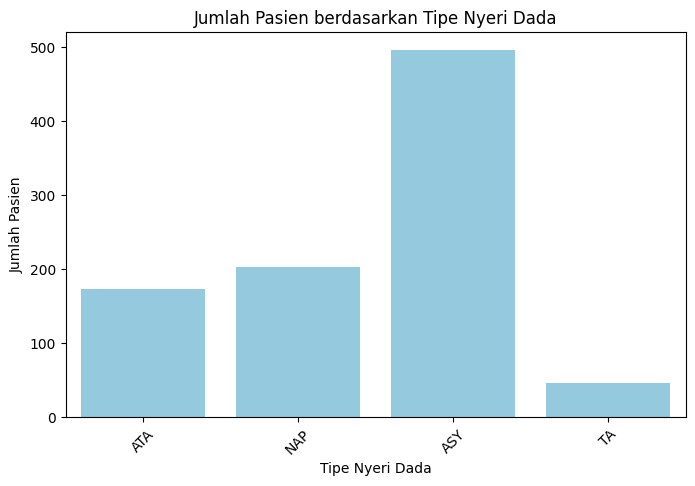

In [4]:
# Load the dataframe (assuming your data is in 'heart.csv')
df = pd.read_csv("heart.csv") # Add this line to load your data into df

plt.figure(figsize=(8, 5))
sns.countplot(x=df["ChestPainType"], color="skyblue")

# Add labels and title
plt.title("Jumlah Pasien berdasarkan Tipe Nyeri Dada")
plt.xlabel("Tipe Nyeri Dada")
plt.ylabel("Jumlah Pasien")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

Grafik di atas menunjukkan jumlah pasien berdasarkan tipe nyeri dada (ChestPainType):

* ASY (Asymptomatic) adalah tipe nyeri dada paling umum, dengan jumlah pasien terbanyak.
* ATA (Atypical Angina) dan NAP (Non-Anginal Pain) memiliki jumlah yang lebih rendah.
* TA (Typical Angina) adalah kategori paling sedikit.

## **Distribusi Tipe Nyeri Dada**

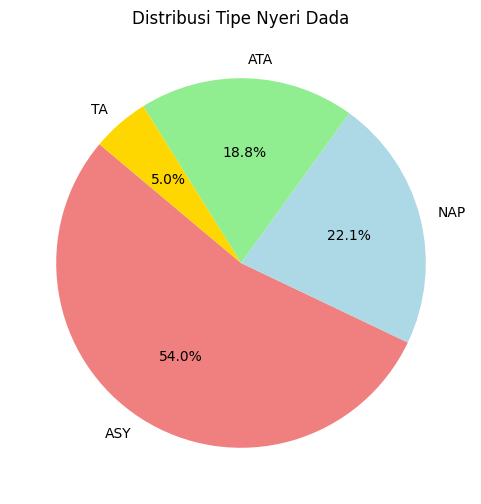

In [8]:
# Plot Pie Chart berdasarkan  Tipe Nyeri Dada.
plt.figure(figsize=(6, 6))
df['ChestPainType'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['lightcoral', 'lightblue', 'lightgreen', 'gold'],
    startangle=140
)

# Tambahkan judul
plt.title("Distribusi Tipe Nyeri Dada")
plt.ylabel("")  # Menghilangkan label y agar lebih bersih

# Tampilkan plot
plt.show()

* **ASY**: Tanpa gejala, sering terkait PJK parah.
* **ATA**: Nyeri dada tidak khas, bisa dari pencernaan atau stres.
* **NAP**: Nyeri dada non-jantung, bisa dari otot atau asam lambung.
* **TA**: Nyeri dada khas PJK, muncul saat aktivitas, hilang saat istirahat.








## **Distribusi usia pasien**

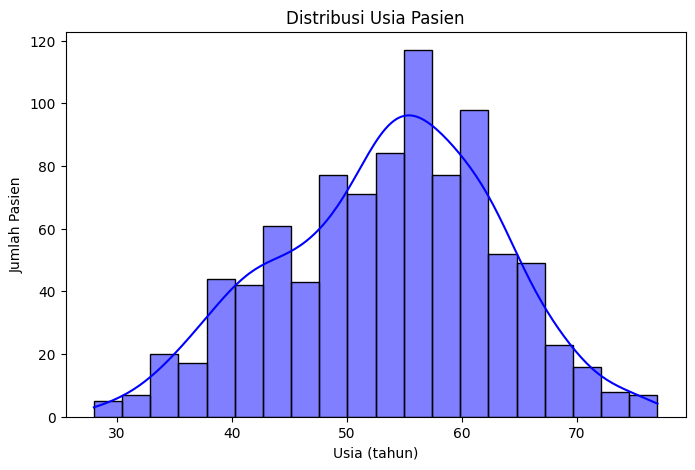

In [12]:
# Membuat histogram untuk distribusi usia pasien
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')

# Menambahkan judul dan label
plt.title('Distribusi Usia Pasien')
plt.xlabel('Usia (tahun)')
plt.ylabel('Jumlah Pasien')

# Menampilkan plot
plt.show()

Histogram menunjukkan distribusi durasi kunjungan pasien dalam menit. Sumbu X mewakili durasi kunjungan, sedangkan sumbu Y menunjukkan jumlah pasien. Bentuk histogram menggambarkan seberapa sering pasien memiliki durasi tertentu. Kurva KDE (Kernel Density Estimation) membantu melihat pola distribusi secara lebih halus.

## **Analisis tren jumlah pasian berdasarkan usia**. ​​








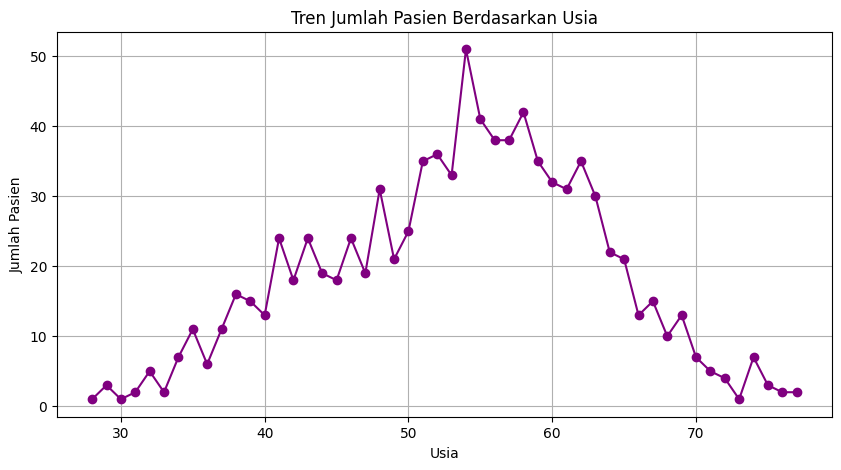

In [15]:
if 'Age' in df.columns:
    # Mengelompokkan jumlah pasien berdasarkan usia
    age_distribution = df['Age'].value_counts().sort_index()

    # Plot line chart
    plt.figure(figsize=(10, 5))
    plt.plot(age_distribution.index, age_distribution.values, marker='o', color='purple')

    # Tambahkan judul dan label
    plt.title("Tren Jumlah Pasien Berdasarkan Usia")
    plt.xlabel("Usia")
    plt.ylabel("Jumlah Pasien")

    # Atur grid dan tata letak
    plt.grid(True)
    plt.show()
else:
    print()

Berikut adalah grafik tren jumlah pasien berdasarkan usia menggunakan line chart. Grafik ini menunjukkan distribusi jumlah pasien pada setiap rentang usia, di mana titik-titik pada garis menggambarkan jumlah pasien dalam kelompok usia tertentu. ​

## **Korelasi Heatmap**

Berikut adalah heatmap korelasi antar variabel numerik dari dataset Anda. Heatmap ini menunjukkan hubungan antara berbagai fitur, dengan nilai korelasi berkisar antara -1 hingga 1. Warna merah menunjukkan korelasi positif yang kuat, sedangkan warna biru menunjukkan korelasi negatif. Tidak ada hubungan yang sangat kuat antara variabel dalam dataset ini, tetapi terdapat beberapa korelasi lemah, seperti antara "Age" dan "MaxHR" dengan korelasi negatif.

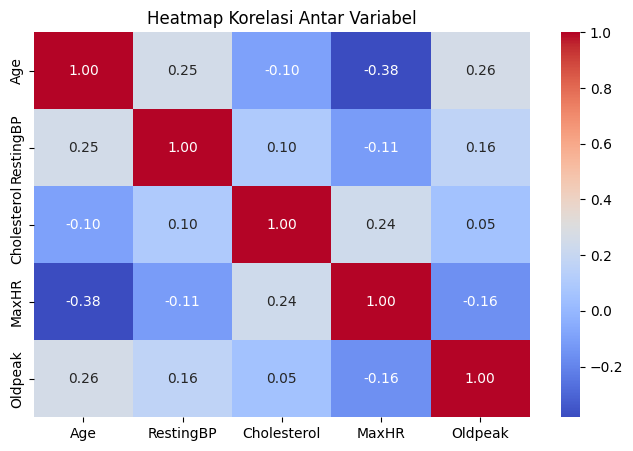

In [17]:
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

## **INSIGHT YANG DIDAPATKAN**

Grafik menunjukkan distribusi usia pasien dengan penyakit jantung, mengidentifikasi kelompok usia yang paling rentan. Tren ini membantu memahami pola risiko penyakit jantung seiring bertambahnya usia dan dapat digunakan untuk strategi pencegahan serta edukasi kesehatan.